In [120]:
# note that username and password are necessary to import satellite imagery from sentinel api

### connect to sentinel2 api

In [153]:
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

# connect to the API
api = SentinelAPI('user', 'pass', 'https://scihub.copernicus.eu/dhus')

In [154]:
api

### define footprint

In [ ]:
# Universal Transverse Mercator (UTM) zones, which, lie between 84 degrees North and 80 degrees South latitude. 
# With few exceptions, they divide the world into sixty zones, each of which is six degrees of longitude wide. 
# The zones are numbered from 1 through 60 eastward from 180 degrees West longitude. The zone characters 
# designate eight degrees of latitude high rows extending north and south from the equator with the exception 
# of the northern-most row which is 12 degrees high.

# from:  https://library.duke.edu/data/files/esri/esridm/2012/world/data/utmzone.html#:~:text=The%20polygons%20represent%20the%20Universal,six%20degrees%20of%20longitude%20wide.
# also see:  https://www.usgs.gov/faqs/what-does-term-utm-mean-utm-better-or-more-accurate-latitudelongitude?qt-news_science_products=0#qt-news_science_products


In [124]:
from geojson import Polygon

In [1]:
# zone 1 should be 84 degrees N to 80 degrees S, -180 to -174
zone1 = Polygon([[(84, -180), (84, -174), (-80, -174), (-80, -180), (84, -180)]])

In [135]:
zone1

{"coordinates": [[[84, -180], [84, -174], [-80, -174], [-80, -180], [84, -180]]], "type": "Polygon"}

In [136]:
import geopandas
from shapely.geometry import Polygon
p3 = Polygon([(84, -180), (84, -174), (-80, -174), (-80, -180), (84, -180)])

<AxesSubplot:>

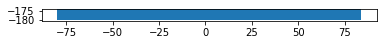

In [132]:
g = geopandas.GeoSeries([p3])
g.plot()

In [ ]:
# [2,57], [23,-20], [-120,20], [2,57], [2,57]

### for creating geojsons quickly!!     http://geojson.io/#map=2/20.0/0.0

In [160]:
# testpoly = 'map.geojson'
testpoly = geojson_to_wkt(read_geojson('map.geojson'))
type(testpoly)

str

### search and download footprint for specific date

In [ ]:
# be careful this is a TON of imagery!!!!!!!

In [162]:
# search by polygon, time, and Hub query keywords
# footprint = geojson_to_wkt(read_geojson('map.geojson'))
footprint = testpoly
products = api.query(footprint,
                     date = ('20191219', date(2019, 12, 29)),
                     platformname = 'Sentinel-2',
                     cloudcoverpercentage = (0, 30))

# download all results from the search
api.download_all(products)

Querying products: 100%|██████████| 190/190 [00:01<00:00, 110.46 products/s]
Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]
Downloading:   0%|          | 0.00/135M [00:00<?, ?B/s]
Downloading:   0%|          | 1.05M/1.04G [00:05<1:27:38, 197kB/s]
Downloading:   0%|          | 3.15M/1.04G [00:07<50:27, 342kB/s]  
Downloading:   1%|          | 5.24M/1.04G [00:08<29:23, 585kB/s][A
Downloading:   1%|          | 7.34M/1.04G [00:09<17:05, 1.00MB/s]A
Downloading:   1%|          | 9.44M/1.04G [00:09<10:54, 1.57MB/s]A
Downloading:   1%|          | 11.5M/1.04G [00:10<07:19, 2.34MB/s]A
Downloading:   1%|▏         | 13.6M/1.04G [00:10<05:17, 3.22MB/s]A
Downloading:   1%|▏         | 14.7M/1.04G [00:10<04:45, 3.58MB/s][A
Downloading:   2%|▏         | 16.8M/1.04G [00:11<03:40, 4.63MB/s][A
Downloading:   2%|▏         | 18.9M/1.04G [00:11<03:43, 4.55MB/s][A
Downloading:   2%|▏         | 21.0M/1.04G [00:12<03:09, 5.37MB/s][A
Downloading:   2%|▏         | 22.0M/1.04G [00:12<02:48, 6.03MB/s][A
D

Downloading:  40%|███▉      | 410M/1.04G [00:50<00:57, 11.0MB/s][A
Downloading:  40%|███▉      | 414M/1.04G [00:50<00:52, 11.9MB/s][A
Downloading:  40%|████      | 416M/1.04G [00:50<00:54, 11.4MB/s][A
Downloading:  40%|████      | 418M/1.04G [00:51<00:55, 11.1MB/s][A
Downloading:  41%|████      | 420M/1.04G [00:51<00:58, 10.6MB/s][A
Downloading:  33%|███▎      | 327M/994M [00:25<01:07, 9.80MB/s]
Downloading:  41%|████      | 424M/1.04G [00:51<01:01, 9.98MB/s][A
Downloading:  33%|███▎      | 330M/994M [00:26<01:12, 9.18MB/s]
Downloading:  41%|████      | 427M/1.04G [00:52<01:01, 9.86MB/s][A
Downloading:  34%|███▎      | 333M/994M [00:26<01:10, 9.41MB/s]
Downloading:  41%|████▏     | 430M/1.04G [00:52<00:59, 10.3MB/s][A
Downloading:  34%|███▍      | 337M/994M [00:26<01:07, 9.78MB/s]
Downloading:  42%|████▏     | 432M/1.04G [00:52<00:57, 10.6MB/s][A
Downloading:  42%|████▏     | 434M/1.04G [00:52<00:59, 10.1MB/s][A
Downloading:  34%|███▍      | 341M/994M [00:27<01:07, 9.65MB/s]
Downloadin

Downloading:  85%|████████▌ | 883M/1.04G [01:32<00:15, 9.96MB/s][A
Downloading:  85%|████████▌ | 885M/1.04G [01:32<00:14, 10.7MB/s][A
Downloading:  85%|████████▌ | 887M/1.04G [01:32<00:13, 11.1MB/s][A
Downloading:  86%|████████▌ | 889M/1.04G [01:32<00:13, 11.2MB/s][A
Downloading:  86%|████████▌ | 891M/1.04G [01:32<00:12, 11.7MB/s][A
Downloading:  86%|████████▌ | 893M/1.04G [01:33<00:13, 10.6MB/s][A
Downloading:  79%|███████▊  | 780M/994M [01:07<00:20, 10.4MB/s]
Downloading:  86%|████████▋ | 895M/1.04G [01:33<00:13, 10.2MB/s][A
Downloading:  86%|████████▋ | 898M/1.04G [01:33<00:13, 10.5MB/s][A
Downloading:  87%|████████▋ | 900M/1.04G [01:33<00:13, 10.5MB/s][A
Downloading:  87%|████████▋ | 904M/1.04G [01:33<00:11, 11.7MB/s][A
Downloading:  87%|████████▋ | 906M/1.04G [01:34<00:11, 12.0MB/s][A
Downloading:  88%|████████▊ | 908M/1.04G [01:34<00:10, 12.3MB/s][A
Downloading:  80%|███████▉  | 795M/994M [01:08<00:16, 12.1MB/s]
Downloading:  88%|████████▊ | 910M/1.04G [01:34<00:11, 11.2MB/s][A
D

Downloading:   2%|▏         | 1.05M/48.3M [00:00<00:05, 7.97MB/s]
Downloading:  66%|██████▋   | 213M/321M [00:25<00:10, 10.0MB/s]s]
Downloading:  67%|██████▋   | 214M/321M [00:26<00:13, 7.96MB/s]s]
Downloading:  67%|██████▋   | 216M/321M [00:26<00:15, 6.97MB/s]s]
Downloading:  11%|█         | 5.24M/48.3M [00:00<00:07, 6.08MB/s]
Downloading:  68%|██████▊   | 218M/321M [00:26<00:13, 7.65MB/s]s]
Downloading:  68%|██████▊   | 219M/321M [00:26<00:14, 6.89MB/s]s]
Downloading:  17%|█▋        | 8.39M/48.3M [00:01<00:05, 6.75MB/s]
Downloading:  69%|██████▉   | 221M/321M [00:26<00:12, 8.00MB/s]s]
Downloading:  70%|██████▉   | 223M/321M [00:27<00:11, 8.40MB/s]s]
Downloading:  70%|███████   | 225M/321M [00:27<00:10, 9.02MB/s]s]
Downloading:  71%|███████   | 228M/321M [00:27<00:09, 9.81MB/s]s]
Downloading:  72%|███████▏  | 230M/321M [00:27<00:09, 9.84MB/s]s]
Downloading:  72%|███████▏  | 231M/321M [00:27<00:09, 9.50MB/s]s]
Downloading:  73%|███████▎  | 233M/321M [00:27<00:08, 10.9MB/s]s]
Downloadin

Downloading:  47%|████▋     | 331M/710M [00:33<00:38, 9.95MB/s]
Downloading:  47%|████▋     | 333M/710M [00:33<00:39, 9.59MB/s]
Downloading:  47%|████▋     | 336M/710M [00:33<01:27, 4.28MB/s]
Downloading:  47%|████▋     | 337M/710M [00:34<01:14, 5.02MB/s]
Downloading:  48%|████▊     | 338M/710M [00:34<01:03, 5.86MB/s]
Downloading:  48%|████▊     | 340M/710M [00:34<00:57, 6.50MB/s]
Downloading:  48%|████▊     | 341M/710M [00:34<00:52, 7.02MB/s]
Downloading:  34%|███▍      | 192M/560M [00:19<00:47, 7.68MB/s]
Downloading:  48%|████▊     | 343M/710M [00:34<00:47, 7.68MB/s]
Downloading:  48%|████▊     | 344M/710M [00:34<00:46, 7.84MB/s]
Downloading:  49%|████▊     | 345M/710M [00:35<00:45, 8.00MB/s]
Downloading:  49%|████▊     | 346M/710M [00:35<00:56, 6.44MB/s]
Downloading:  35%|███▌      | 198M/560M [00:20<00:51, 7.08MB/s]
Downloading:  49%|████▉     | 348M/710M [00:35<00:52, 6.86MB/s]
Downloading:  49%|████▉     | 349M/710M [00:35<00:52, 6.94MB/s]
Downloading:  49%|████▉     | 350M/710M 

MD5 checksumming:  29%|██▊       | 160M/560M [00:00<00:00, 528MB/s]
Downloading:  94%|█████████▍| 668M/710M [01:15<00:05, 7.14MB/s]B/s]
MD5 checksumming:  49%|████▊     | 272M/560M [00:00<00:00, 543MB/s]
Downloading:  94%|█████████▍| 670M/710M [01:15<00:04, 8.24MB/s]B/s]
Downloading:  95%|█████████▍| 672M/710M [01:15<00:04, 9.33MB/s]B/s]
Downloading:  95%|█████████▍| 673M/710M [01:15<00:03, 9.60MB/s]B/s]
MD5 checksumming:  89%|████████▉ | 497M/560M [00:00<00:00, 555MB/s]
MD5 checksumming: 100%|██████████| 560M/560M [00:01<00:00, 556MB/s]
Downloading:  96%|█████████▌| 682M/710M [01:16<00:02, 11.8MB/s]
Downloading:  96%|█████████▌| 684M/710M [01:16<00:02, 12.1MB/s]
Downloading:  97%|█████████▋| 686M/710M [01:16<00:02, 12.0MB/s]]
Downloading:  97%|█████████▋| 690M/710M [01:16<00:01, 12.5MB/s]]
Downloading:  97%|█████████▋| 692M/710M [01:16<00:01, 12.2MB/s]]
Downloading:   4%|▍         | 4.19M/107M [00:00<00:18, 5.52MB/s]
Downloading:  98%|█████████▊| 694M/710M [01:17<00:01, 12.1MB/s]]
Dow

Downloading:  18%|█▊        | 166M/912M [00:15<00:54, 13.7MB/s]
Downloading:  18%|█▊        | 168M/912M [00:16<00:56, 13.2MB/s]
Downloading:  19%|█▉        | 172M/912M [00:16<01:00, 12.3MB/s]
Downloading:  19%|█▉        | 174M/912M [00:16<00:58, 12.6MB/s]
Downloading:  19%|█▉        | 176M/912M [00:16<00:57, 12.8MB/s]
Downloading:  20%|█▉        | 178M/912M [00:16<00:55, 13.2MB/s]
Downloading:  20%|█▉        | 180M/912M [00:17<00:53, 13.6MB/s]
Downloading:  20%|██        | 182M/912M [00:17<00:53, 13.7MB/s]
Downloading:  20%|██        | 185M/912M [00:17<00:52, 13.8MB/s]
Downloading:  20%|██        | 187M/912M [00:17<00:52, 13.9MB/s]
Downloading:  21%|██        | 189M/912M [00:17<00:51, 14.0MB/s]
Downloading:  21%|██        | 191M/912M [00:17<00:51, 14.1MB/s]
Downloading:  21%|██        | 193M/912M [00:17<00:54, 13.1MB/s]
Downloading:  21%|██▏       | 195M/912M [00:18<01:29, 8.04MB/s]
Downloading:  39%|███▊      | 362M/937M [00:33<01:01, 9.41MB/s]
Downloading:  22%|██▏       | 197M/912M 

Downloading:  63%|██████▎   | 571M/912M [00:59<01:04, 5.30MB/s]
Downloading:  63%|██████▎   | 573M/912M [00:59<00:59, 5.68MB/s]
Downloading:  63%|██████▎   | 575M/912M [00:59<00:51, 6.50MB/s]
Downloading:  63%|██████▎   | 576M/912M [00:59<00:46, 7.21MB/s]
Downloading:  63%|██████▎   | 578M/912M [00:59<00:42, 7.89MB/s]
Downloading:  63%|██████▎   | 579M/912M [00:59<00:41, 8.09MB/s]
Downloading:  64%|██████▎   | 581M/912M [01:00<00:40, 8.13MB/s]
Downloading:  64%|██████▍   | 582M/912M [01:00<00:40, 8.10MB/s]
Downloading:  64%|██████▍   | 584M/912M [01:00<00:38, 8.53MB/s]
Downloading:  64%|██████▍   | 585M/912M [01:00<00:38, 8.42MB/s]
Downloading:  64%|██████▍   | 586M/912M [01:00<00:42, 7.67MB/s]
Downloading:  65%|██████▍   | 588M/912M [01:01<00:46, 6.93MB/s]
Downloading:  65%|██████▍   | 589M/912M [01:01<00:45, 7.16MB/s]
Downloading:  65%|██████▍   | 590M/912M [01:01<00:41, 7.70MB/s]
Downloading:  65%|██████▍   | 592M/912M [01:01<00:39, 7.99MB/s]
Downloading:  92%|█████████▏| 858M/937M 

Downloading:  22%|██▏       | 75.5M/342M [00:07<00:23, 11.5MB/s][A
Downloading:  23%|██▎       | 77.6M/342M [00:07<00:21, 12.2MB/s][A
Downloading:  23%|██▎       | 79.7M/342M [00:07<00:22, 11.9MB/s][A
Downloading:  24%|██▍       | 81.8M/342M [00:07<00:21, 12.1MB/s][A
Downloading:  25%|██▍       | 83.9M/342M [00:08<00:22, 11.5MB/s][A
Downloading:  25%|██▌       | 86.0M/342M [00:08<00:21, 12.1MB/s][A
Downloading:  26%|██▌       | 88.1M/342M [00:08<00:21, 11.6MB/s][A
Downloading:  26%|██▋       | 90.2M/342M [00:08<00:21, 11.7MB/s][A
Downloading:  28%|██▊       | 94.4M/342M [00:09<00:23, 10.8MB/s][A
Downloading:  28%|██▊       | 96.5M/342M [00:09<00:23, 10.5MB/s][A
Downloading:  29%|██▉       | 98.6M/342M [00:09<00:21, 11.4MB/s][A
Downloading:  29%|██▉       | 101M/342M [00:09<00:21, 11.3MB/s] [A
Downloading:  30%|███       | 103M/342M [00:09<00:21, 11.3MB/s]
Downloading:  31%|███       | 105M/342M [00:09<00:19, 12.0MB/s]
Downloading:  31%|███       | 107M/342M [00:10<00:19, 12.1MB/s]
Down

Downloading:  10%|█         | 52.4M/500M [00:04<00:41, 10.8MB/s]]
Downloading:  11%|█         | 54.5M/500M [00:05<00:41, 10.8MB/s]]
Downloading:  11%|█▏        | 56.6M/500M [00:05<00:40, 10.9MB/s]]
Downloading: 100%|██████████| 58.9M/58.9M [00:05<00:00, 11.6MB/s]

MD5 checksumming:   0%|          | 0.00/58.9M [00:00<?, ?B/s]
MD5 checksumming: 100%|██████████| 58.9M/58.9M [00:00<00:00, 526MB/s]
Downloading:  14%|█▍        | 71.3M/500M [00:06<00:32, 13.0MB/s]
Downloading:  15%|█▍        | 73.4M/500M [00:06<00:32, 13.1MB/s]
Downloading:  15%|█▌        | 75.5M/500M [00:06<00:31, 13.3MB/s]
Downloading:  16%|█▌        | 77.6M/500M [00:06<00:33, 12.5MB/s]
Downloading:  16%|█▌        | 79.7M/500M [00:07<00:37, 11.2MB/s]
Downloading:  16%|█▋        | 81.8M/500M [00:07<00:35, 11.8MB/s]
Downloading:  17%|█▋        | 83.9M/500M [00:07<00:33, 12.5MB/s]
Downloading:  18%|█▊        | 88.1M/500M [00:07<00:30, 13.5MB/s]
Downloading:  18%|█▊        | 90.2M/500M [00:07<00:29, 14.0MB/s]
Downloading:  18%|

Downloading:  11%|█▏        | 14.7M/130M [00:01<00:10, 11.0MB/s][A
Downloading:  13%|█▎        | 16.8M/130M [00:01<00:09, 11.4MB/s][A
Downloading:  52%|█████▏    | 374M/721M [00:36<00:25, 13.6MB/s]
Downloading:  15%|█▍        | 18.9M/130M [00:01<00:10, 10.5MB/s][A
Downloading:  16%|█▌        | 21.0M/130M [00:01<00:10, 10.9MB/s][A
Downloading:  18%|█▊        | 23.1M/130M [00:02<00:09, 11.3MB/s][A
Downloading:  19%|█▉        | 25.2M/130M [00:02<00:09, 11.1MB/s][A
Downloading:  21%|██        | 27.3M/130M [00:02<00:08, 11.7MB/s][A
Downloading:  23%|██▎       | 29.4M/130M [00:02<00:08, 11.8MB/s][A
Downloading:  24%|██▍       | 31.5M/130M [00:02<00:07, 12.3MB/s][A
Downloading:  54%|█████▍    | 391M/721M [00:37<00:23, 13.8MB/s]
Downloading:  26%|██▌       | 33.6M/130M [00:03<00:07, 12.3MB/s][A
Downloading:  27%|██▋       | 35.7M/130M [00:03<00:08, 11.8MB/s][A
Downloading:  29%|██▉       | 37.7M/130M [00:03<00:07, 12.2MB/s][A
Downloading:  31%|███       | 39.8M/130M [00:03<00:07, 12.4MB/s][A
D

Downloading:  41%|████▏     | 105M/254M [00:09<00:11, 12.6MB/s]
Downloading:  42%|████▏     | 107M/254M [00:09<00:12, 12.1MB/s]
Downloading:  44%|████▍     | 111M/254M [00:09<00:11, 11.9MB/s]
Downloading:  45%|████▍     | 113M/254M [00:09<00:12, 11.5MB/s]
Downloading:  45%|████▌     | 115M/254M [00:10<00:12, 10.9MB/s]
Downloading:  46%|████▌     | 117M/254M [00:10<00:12, 10.6MB/s]
Downloading:  47%|████▋     | 120M/254M [00:10<00:12, 10.9MB/s]
Downloading:  48%|████▊     | 122M/254M [00:10<00:11, 11.6MB/s]
Downloading:  49%|████▊     | 124M/254M [00:10<00:10, 12.0MB/s]
Downloading:  50%|████▉     | 126M/254M [00:11<00:10, 12.6MB/s]
Downloading:  50%|█████     | 128M/254M [00:11<00:10, 12.3MB/s]
Downloading:  51%|█████     | 130M/254M [00:11<00:09, 12.6MB/s]
Downloading:  52%|█████▏    | 132M/254M [00:11<00:09, 12.6MB/s]
Downloading:  53%|█████▎    | 134M/254M [00:11<00:09, 12.5MB/s]
Downloading:  54%|█████▎    | 136M/254M [00:11<00:09, 12.8MB/s]
Downloading:  54%|█████▍    | 138M/254M 

Downloading:  35%|███▌      | 272M/771M [00:22<00:42, 11.7MB/s]
Downloading:  35%|███▌      | 274M/771M [00:22<00:42, 11.6MB/s]
Downloading:  91%|█████████ | 635M/700M [00:55<00:07, 8.79MB/s]
Downloading:  36%|███▌      | 278M/771M [00:22<00:43, 11.3MB/s]
Downloading:  91%|█████████ | 639M/700M [00:55<00:07, 8.21MB/s]
Downloading:  36%|███▋      | 280M/771M [00:22<00:40, 12.1MB/s]
Downloading:  37%|███▋      | 282M/771M [00:23<00:43, 11.4MB/s]
Downloading:  37%|███▋      | 284M/771M [00:23<00:42, 11.5MB/s]
Downloading:  37%|███▋      | 288M/771M [00:23<00:42, 11.3MB/s]
Downloading:  38%|███▊      | 290M/771M [00:23<00:39, 12.2MB/s]
Downloading:  38%|███▊      | 293M/771M [00:24<00:37, 12.9MB/s]
Downloading:  38%|███▊      | 295M/771M [00:24<00:36, 13.0MB/s]
Downloading:  38%|███▊      | 297M/771M [00:24<00:34, 13.6MB/s]
Downloading:  39%|███▉      | 299M/771M [00:24<00:34, 13.7MB/s]
Downloading:  39%|███▉      | 303M/771M [00:24<00:34, 13.7MB/s]
Downloading:  40%|███▉      | 305M/771M 

Downloading:  99%|█████████▊| 760M/771M [01:02<00:01, 10.5MB/s]
Downloading:  99%|█████████▉| 762M/771M [01:02<00:00, 9.76MB/s]
Downloading:  99%|█████████▉| 764M/771M [01:03<00:00, 11.1MB/s]
Downloading:  99%|█████████▉| 767M/771M [01:03<00:00, 11.8MB/s]
Downloading: 100%|█████████▉| 771M/771M [01:03<00:00, 13.7MB/s]
Downloading: 100%|██████████| 771M/771M [01:03<00:00, 12.1MB/s]
MD5 checksumming:   5%|▍         | 36.6M/771M [00:00<00:02, 366MB/s]
MD5 checksumming:  11%|█         | 81.8M/771M [00:00<00:01, 388MB/s]
MD5 checksumming:  17%|█▋        | 129M/771M [00:00<00:01, 410MB/s] 
MD5 checksumming:  37%|███▋      | 285M/771M [00:00<00:01, 476MB/s]
MD5 checksumming:  43%|████▎     | 329M/771M [00:00<00:00, 458MB/s]
MD5 checksumming:  49%|████▉     | 379M/771M [00:00<00:00, 469MB/s]
MD5 checksumming:  62%|██████▏   | 477M/771M [00:01<00:00, 481MB/s]
MD5 checksumming:  75%|███████▌  | 580M/771M [00:01<00:00, 499MB/s]
MD5 checksumming:  82%|████████▏ | 629M/771M [00:01<00:00, 498MB/s]
M

Downloading:  85%|████████▍ | 667M/786M [01:10<00:15, 7.69MB/s]
Downloading:  45%|████▌     | 363M/803M [00:42<01:57, 3.76MB/s]
Downloading:  85%|████████▌ | 669M/786M [01:10<00:14, 8.27MB/s]
Downloading:  45%|████▌     | 364M/803M [00:42<01:49, 4.00MB/s]
Downloading:  45%|████▌     | 365M/803M [00:42<01:43, 4.21MB/s]
Downloading:  85%|████████▌ | 672M/786M [01:10<00:13, 8.49MB/s]
Downloading:  46%|████▌     | 366M/803M [00:42<01:48, 4.01MB/s]
Downloading:  86%|████████▌ | 674M/786M [01:11<00:15, 7.24MB/s]
Downloading:  46%|████▌     | 367M/803M [00:43<01:45, 4.13MB/s]
Downloading:  46%|████▌     | 368M/803M [00:43<01:38, 4.43MB/s]
Downloading:  86%|████████▌ | 677M/786M [01:11<00:13, 7.97MB/s]
Downloading:  46%|████▌     | 369M/803M [00:43<01:35, 4.55MB/s]
Downloading:  86%|████████▋ | 679M/786M [01:11<00:12, 8.67MB/s]
Downloading:  46%|████▌     | 370M/803M [00:43<01:26, 4.99MB/s]
Downloading:  46%|████▋     | 372M/803M [00:43<01:18, 5.50MB/s]
Downloading:  87%|████████▋ | 685M/786M 

Downloading:  29%|██▉       | 235M/807M [00:22<00:35, 16.0MB/s]
Downloading:  29%|██▉       | 237M/807M [00:22<00:35, 16.3MB/s]
Downloading:   1%|          | 1.05M/101M [00:00<00:50, 2.00MB/s][A
Downloading:   2%|▏         | 2.10M/101M [00:00<00:38, 2.55MB/s][A
Downloading:   4%|▍         | 4.19M/101M [00:00<00:29, 3.34MB/s][A
Downloading:   6%|▌         | 6.29M/101M [00:01<00:22, 4.27MB/s][A
Downloading:   8%|▊         | 8.39M/101M [00:01<00:17, 5.35MB/s][A
Downloading:   9%|▉         | 9.44M/101M [00:01<00:15, 5.88MB/s][A
Downloading:  11%|█▏        | 11.5M/101M [00:01<00:12, 7.08MB/s][A
Downloading:  13%|█▎        | 13.6M/101M [00:01<00:10, 8.17MB/s][A
Downloading:  16%|█▌        | 15.7M/101M [00:01<00:09, 9.43MB/s][A
Downloading:  18%|█▊        | 17.8M/101M [00:01<00:07, 10.5MB/s][A
Downloading:  20%|█▉        | 19.9M/101M [00:02<00:07, 11.3MB/s][A
Downloading:  22%|██▏       | 22.0M/101M [00:02<00:06, 11.8MB/s][A
Downloading:  24%|██▍       | 24.1M/101M [00:02<00:06, 12.3MB/s][A
D

Downloading:  98%|█████████▊| 141M/143M [00:36<00:00, 9.04MB/s]
Downloading:  99%|█████████▉| 142M/143M [00:36<00:00, 8.46MB/s]
Downloading: 100%|██████████| 143M/143M [00:36<00:00, 3.88MB/s]
MD5 checksumming:   0%|          | 0.00/143M [00:00<?, ?B/s]
MD5 checksumming:  75%|███████▌  | 108M/143M [00:00<00:00, 530MB/s] 
MD5 checksumming: 100%|██████████| 143M/143M [00:00<00:00, 532MB/s]

Downloading:  80%|████████  | 648M/807M [01:34<00:12, 12.9MB/s]
Downloading:  81%|████████  | 650M/807M [01:34<00:11, 13.6MB/s]
Downloading:  81%|████████  | 652M/807M [01:34<00:10, 14.3MB/s]
Downloading:   0%|          | 0.00/537M [00:00<?, ?B/s]4.1MB/s]
Downloading:   0%|          | 1.05M/537M [00:00<01:25, 6.26MB/s][A
Downloading:   0%|          | 2.10M/537M [00:00<01:19, 6.76MB/s][A
Downloading:   1%|          | 3.15M/537M [00:00<01:16, 6.97MB/s][A
Downloading:   1%|          | 4.19M/537M [00:00<01:14, 7.19MB/s][A
Downloading:   1%|          | 5.24M/537M [00:00<01:10, 7.50MB/s][A
Downloading:   1%|

Downloading:  81%|████████  | 434M/537M [00:40<00:08, 11.6MB/s]]
Downloading:   3%|▎         | 21.0M/633M [00:02<01:12, 8.49MB/s]
Downloading:  81%|████████  | 436M/537M [00:41<00:08, 11.4MB/s]]
Downloading:  82%|████████▏ | 438M/537M [00:41<00:08, 11.4MB/s]]
Downloading:  82%|████████▏ | 440M/537M [00:41<00:08, 10.9MB/s]]
Downloading:  82%|████████▏ | 442M/537M [00:41<00:08, 11.5MB/s]]
Downloading:  83%|████████▎ | 445M/537M [00:41<00:07, 11.8MB/s]]
Downloading:  83%|████████▎ | 447M/537M [00:42<00:07, 11.7MB/s]]
Downloading:  84%|████████▎ | 449M/537M [00:42<00:07, 12.0MB/s]]
Downloading:  84%|████████▍ | 451M/537M [00:42<00:07, 12.3MB/s]]
Downloading:  84%|████████▍ | 453M/537M [00:42<00:06, 12.3MB/s]]
Downloading:  85%|████████▍ | 455M/537M [00:42<00:06, 11.8MB/s]]
Downloading:  85%|████████▌ | 457M/537M [00:42<00:06, 12.3MB/s]]
Downloading:  85%|████████▌ | 459M/537M [00:43<00:06, 12.1MB/s]]
Downloading:  86%|████████▌ | 461M/537M [00:43<00:06, 11.7MB/s]]
Downloading:  86%|███████

Downloading:  26%|██▌       | 149M/580M [00:29<02:29, 2.88MB/s]
Downloading:  75%|███████▌  | 475M/633M [00:42<00:31, 5.04MB/s]
Downloading:  26%|██▌       | 150M/580M [00:29<02:34, 2.79MB/s]
Downloading:  26%|██▌       | 151M/580M [00:30<02:26, 2.92MB/s]
Downloading:  76%|███████▌  | 478M/633M [00:43<00:28, 5.36MB/s]
Downloading:  26%|██▌       | 152M/580M [00:30<02:23, 2.99MB/s]
Downloading:  76%|███████▌  | 480M/633M [00:43<00:28, 5.33MB/s]
Downloading:  26%|██▋       | 153M/580M [00:30<02:26, 2.93MB/s]
Downloading:  76%|███████▌  | 482M/633M [00:44<00:27, 5.58MB/s]
Downloading:  27%|██▋       | 154M/580M [00:31<02:29, 2.86MB/s]
Downloading:  27%|██▋       | 155M/580M [00:31<02:28, 2.86MB/s]
Downloading:  77%|███████▋  | 485M/633M [00:44<00:30, 4.80MB/s]
Downloading:  27%|██▋       | 156M/580M [00:31<02:25, 2.92MB/s]
Downloading:  77%|███████▋  | 488M/633M [00:45<00:28, 5.10MB/s]
Downloading:  27%|██▋       | 157M/580M [00:32<02:23, 2.94MB/s]
Downloading:  77%|███████▋  | 490M/633M 

Downloading:   1%|          | 3.15M/474M [00:00<01:29, 5.25MB/s]
Downloading:   1%|          | 5.24M/474M [00:00<01:15, 6.21MB/s]
Downloading:   2%|▏         | 7.34M/474M [00:00<01:04, 7.21MB/s]
Downloading:   2%|▏         | 9.44M/474M [00:01<00:55, 8.33MB/s]
Downloading:   2%|▏         | 11.5M/474M [00:01<00:51, 9.01MB/s]
Downloading:   3%|▎         | 13.6M/474M [00:01<00:47, 9.61MB/s]
Downloading:   3%|▎         | 15.7M/474M [00:01<00:44, 10.4MB/s]
Downloading:   4%|▍         | 17.8M/474M [00:01<00:43, 10.5MB/s]
Downloading:   4%|▍         | 19.9M/474M [00:01<00:40, 11.1MB/s]
Downloading:  19%|█▉        | 89.1M/472M [00:07<00:28, 13.3MB/s]
Downloading:   5%|▍         | 22.0M/474M [00:02<00:39, 11.5MB/s]
Downloading:   5%|▌         | 24.1M/474M [00:02<00:38, 11.8MB/s]
Downloading:   6%|▌         | 26.2M/474M [00:02<00:36, 12.3MB/s]
Downloading:   6%|▌         | 28.3M/474M [00:02<00:37, 11.9MB/s]
Downloading:   6%|▋         | 30.4M/474M [00:02<00:36, 12.3MB/s]
Downloading:   7%|▋      

Downloading:   0%|          | 0.00/352M [00:00<?, ?B/s]15.7MB/s]
Downloading:  32%|███▏      | 74.4M/231M [00:05<00:09, 15.8MB/s]
Downloading:  33%|███▎      | 76.5M/231M [00:05<00:10, 15.4MB/s]
Downloading:   0%|          | 1.05M/352M [00:00<02:02, 2.85MB/s]
Downloading:  35%|███▌      | 80.7M/231M [00:06<00:09, 15.8MB/s]
Downloading:  36%|███▌      | 82.8M/231M [00:06<00:09, 15.8MB/s]
Downloading:   1%|          | 2.10M/352M [00:00<02:02, 2.86MB/s]
Downloading:  38%|███▊      | 87.0M/231M [00:06<00:08, 16.3MB/s]
Downloading:   1%|          | 3.15M/352M [00:01<01:55, 3.03MB/s]
Downloading:  40%|███▉      | 91.2M/231M [00:06<00:08, 16.5MB/s]
Downloading:  40%|████      | 93.3M/231M [00:06<00:08, 16.7MB/s]
Downloading:   1%|          | 4.19M/352M [00:01<01:57, 2.96MB/s]
Downloading:  42%|████▏     | 97.5M/231M [00:07<00:08, 15.8MB/s]
Downloading:  43%|████▎     | 99.6M/231M [00:07<00:08, 15.8MB/s]
Downloading:   1%|▏         | 5.24M/352M [00:01<02:02, 2.83MB/s]
Downloading:  45%|████▌  

Downloading:  92%|█████████▏| 323M/352M [00:38<00:02, 12.9MB/s]
Downloading:  92%|█████████▏| 325M/352M [00:39<00:02, 12.7MB/s]
Downloading:  93%|█████████▎| 327M/352M [00:39<00:01, 13.1MB/s]
Downloading:  94%|█████████▎| 329M/352M [00:39<00:01, 13.0MB/s]
Downloading:  94%|█████████▍| 331M/352M [00:39<00:01, 13.2MB/s]
Downloading:  95%|█████████▍| 333M/352M [00:39<00:01, 13.0MB/s]
Downloading:  96%|█████████▌| 338M/352M [00:40<00:01, 12.9MB/s]
Downloading:  97%|█████████▋| 340M/352M [00:40<00:00, 12.8MB/s]
Downloading:  97%|█████████▋| 342M/352M [00:40<00:00, 12.5MB/s]
Downloading:  98%|█████████▊| 344M/352M [00:40<00:00, 11.8MB/s]
Downloading:  98%|█████████▊| 346M/352M [00:40<00:00, 11.9MB/s]
Downloading:  99%|█████████▉| 348M/352M [00:40<00:00, 12.3MB/s]
Downloading: 100%|██████████| 352M/352M [00:41<00:00, 8.54MB/s]
MD5 checksumming:   0%|          | 0.00/352M [00:00<?, ?B/s]
MD5 checksumming:  27%|██▋       | 95.6M/352M [00:00<00:00, 463MB/s]
MD5 checksumming:  41%|████      | 143

Downloading:  54%|█████▎    | 438M/816M [00:36<00:46, 8.17MB/s]
Downloading:  54%|█████▍    | 439M/816M [00:36<00:50, 7.47MB/s]
Downloading:  54%|█████▍    | 441M/816M [00:36<00:46, 8.02MB/s]
Downloading:  54%|█████▍    | 442M/816M [00:36<00:52, 7.15MB/s]
Downloading:  33%|███▎      | 170M/518M [00:22<00:46, 7.52MB/s]
Downloading:  55%|█████▍    | 445M/816M [00:37<00:46, 8.03MB/s]
Downloading:  55%|█████▍    | 446M/816M [00:37<00:52, 7.00MB/s]
Downloading:  55%|█████▍    | 447M/816M [00:37<00:52, 7.07MB/s]
Downloading:  34%|███▎      | 174M/518M [00:23<00:45, 7.56MB/s]
Downloading:  55%|█████▍    | 448M/816M [00:37<01:10, 5.24MB/s]
Downloading:  55%|█████▌    | 450M/816M [00:37<00:57, 6.41MB/s]
Downloading:  55%|█████▌    | 451M/816M [00:37<00:55, 6.55MB/s]
Downloading:  55%|█████▌    | 452M/816M [00:38<00:55, 6.53MB/s]
Downloading:  56%|█████▌    | 453M/816M [00:38<00:59, 6.05MB/s]
Downloading:  56%|█████▌    | 454M/816M [00:38<00:57, 6.32MB/s]
Downloading:  56%|█████▌    | 455M/816M 

Downloading:  89%|████████▉ | 728M/816M [01:19<00:06, 12.6MB/s]]
Downloading:  89%|████████▉ | 730M/816M [01:19<00:06, 12.8MB/s]]
Downloading:  90%|████████▉ | 732M/816M [01:20<00:06, 12.8MB/s]]
Downloading:  90%|████████▉ | 734M/816M [01:20<00:06, 13.0MB/s]]
Downloading:  90%|█████████ | 736M/816M [01:20<00:06, 13.2MB/s]]
Downloading:  91%|█████████ | 738M/816M [01:20<00:06, 12.6MB/s]]
Downloading:  91%|█████████ | 740M/816M [01:20<00:06, 10.8MB/s]]
Downloading:  91%|█████████ | 742M/816M [01:20<00:06, 11.0MB/s]]
Downloading:   5%|▌         | 43.0M/804M [00:03<01:02, 12.2MB/s]
Downloading:  91%|█████████▏| 744M/816M [01:21<00:06, 11.2MB/s]]
Downloading:  92%|█████████▏| 747M/816M [01:21<00:05, 11.6MB/s]]
Downloading:  92%|█████████▏| 749M/816M [01:21<00:05, 11.7MB/s]]
Downloading:  92%|█████████▏| 751M/816M [01:21<00:05, 11.8MB/s]]
Downloading:  92%|█████████▏| 753M/816M [01:21<00:05, 11.8MB/s]]
Downloading:   7%|▋         | 55.6M/804M [00:04<00:54, 13.7MB/s]
Downloading:   7%|▋      

Downloading:  48%|████▊     | 302M/627M [00:27<00:22, 14.2MB/s]
Downloading:  48%|████▊     | 304M/627M [00:27<00:22, 14.1MB/s]
Downloading:  49%|████▉     | 306M/627M [00:27<00:22, 14.1MB/s]
Downloading:  49%|████▉     | 308M/627M [00:28<00:24, 13.0MB/s]
Downloading:  50%|████▉     | 312M/627M [00:28<00:22, 13.9MB/s]
Downloading:  50%|█████     | 315M/627M [00:28<00:22, 14.0MB/s]
Downloading:  50%|█████     | 317M/627M [00:28<00:22, 13.8MB/s]
Downloading:  51%|█████     | 319M/627M [00:28<00:22, 13.7MB/s]
Downloading:  51%|█████     | 321M/627M [00:29<00:23, 12.9MB/s]
Downloading:  51%|█████▏    | 323M/627M [00:29<00:22, 13.4MB/s]
Downloading:  52%|█████▏    | 325M/627M [00:29<00:22, 13.3MB/s]
Downloading:  52%|█████▏    | 329M/627M [00:29<00:21, 13.7MB/s]
Downloading:  53%|█████▎    | 331M/627M [00:29<00:21, 13.8MB/s]
Downloading:  53%|█████▎    | 333M/627M [00:29<00:21, 13.5MB/s]
Downloading:  53%|█████▎    | 336M/627M [00:30<00:22, 13.3MB/s]
Downloading:  54%|█████▍    | 338M/627M 

Downloading:  16%|█▌        | 125M/791M [00:10<00:48, 13.8MB/s]
Downloading:  16%|█▌        | 127M/791M [00:10<00:47, 13.9MB/s]
Downloading:  16%|█▋        | 129M/791M [00:10<00:50, 13.0MB/s]
Downloading:  17%|█▋        | 131M/791M [00:11<00:58, 11.2MB/s]
Downloading:  17%|█▋        | 133M/791M [00:11<00:56, 11.5MB/s]
Downloading:  17%|█▋        | 135M/791M [00:11<00:54, 12.0MB/s]
Downloading:  17%|█▋        | 137M/791M [00:11<00:56, 11.5MB/s]
Downloading:  18%|█▊        | 139M/791M [00:11<01:01, 10.6MB/s]
Downloading:  18%|█▊        | 142M/791M [00:12<01:14, 8.74MB/s]
Downloading:  18%|█▊        | 144M/791M [00:12<01:19, 8.19MB/s]
Downloading:  18%|█▊        | 146M/791M [00:12<01:14, 8.70MB/s]
Downloading:  19%|█▊        | 147M/791M [00:12<01:23, 7.70MB/s]
Downloading:  19%|█▉        | 151M/791M [00:13<01:07, 9.45MB/s]
Downloading:  19%|█▉        | 152M/791M [00:13<01:07, 9.52MB/s]
Downloading:  19%|█▉        | 154M/791M [00:13<01:02, 10.2MB/s]
Downloading:  20%|█▉        | 156M/791M 

Downloading:  76%|███████▌  | 600M/791M [00:51<00:13, 13.7MB/s]
Downloading:  76%|███████▌  | 602M/791M [00:51<00:13, 13.8MB/s]
Downloading:  76%|███████▋  | 604M/791M [00:51<00:13, 13.7MB/s]
Downloading:  77%|███████▋  | 606M/791M [00:51<00:13, 13.8MB/s]
Downloading:  77%|███████▋  | 608M/791M [00:51<00:13, 13.9MB/s]
Downloading:  77%|███████▋  | 610M/791M [00:51<00:13, 13.8MB/s]
Downloading:  77%|███████▋  | 612M/791M [00:52<00:12, 13.8MB/s]
Downloading:  78%|███████▊  | 614M/791M [00:52<00:12, 13.6MB/s]
Downloading:  78%|███████▊  | 617M/791M [00:52<00:12, 13.7MB/s]
Downloading:  78%|███████▊  | 619M/791M [00:52<00:12, 13.7MB/s]
Downloading:  79%|███████▊  | 621M/791M [00:52<00:12, 13.9MB/s]
Downloading:  79%|███████▉  | 623M/791M [00:52<00:12, 13.1MB/s]
Downloading:  79%|███████▉  | 625M/791M [00:53<00:12, 13.3MB/s]
Downloading:  79%|███████▉  | 627M/791M [00:53<00:12, 13.4MB/s]
Downloading:  80%|███████▉  | 629M/791M [00:53<00:12, 13.3MB/s]
Downloading:  80%|███████▉  | 631M/791M 

Downloading:  68%|██████▊   | 263M/387M [00:22<00:11, 11.2MB/s]
Downloading:  69%|██████▊   | 265M/387M [00:22<00:10, 11.7MB/s]
Downloading:  69%|██████▉   | 267M/387M [00:23<00:10, 11.5MB/s]
Downloading:  70%|██████▉   | 269M/387M [00:23<00:10, 11.7MB/s]
Downloading:  70%|███████   | 272M/387M [00:23<00:10, 11.3MB/s]
Downloading:  71%|███████   | 274M/387M [00:23<00:09, 11.7MB/s]
Downloading:  71%|███████▏  | 276M/387M [00:23<00:09, 11.3MB/s]
Downloading:  72%|███████▏  | 278M/387M [00:24<00:09, 11.1MB/s]
Downloading:  72%|███████▏  | 280M/387M [00:24<00:09, 11.8MB/s]
Downloading:  73%|███████▎  | 282M/387M [00:24<00:08, 12.2MB/s]
Downloading:  73%|███████▎  | 284M/387M [00:24<00:08, 12.6MB/s]
Downloading:  74%|███████▍  | 286M/387M [00:24<00:07, 12.9MB/s]
Downloading:  75%|███████▍  | 288M/387M [00:24<00:07, 13.2MB/s]
Downloading:  75%|███████▌  | 290M/387M [00:24<00:07, 13.2MB/s]
Downloading:  76%|███████▌  | 293M/387M [00:25<00:07, 13.2MB/s]
Downloading:  76%|███████▌  | 295M/387M 

Downloading:  94%|█████████▍| 524M/557M [00:46<00:10, 3.21MB/s]]
Downloading:  95%|█████████▍| 526M/557M [00:47<00:09, 3.35MB/s]]
Downloading:  95%|█████████▍| 527M/557M [00:47<00:08, 3.33MB/s]]
Downloading:  59%|█████▉    | 74.4M/127M [00:29<00:17, 2.97MB/s]
Downloading:  95%|█████████▍| 528M/557M [00:47<00:08, 3.50MB/s]]
Downloading:  95%|█████████▌| 530M/557M [00:47<00:07, 3.54MB/s]]
Downloading:  95%|█████████▌| 531M/557M [00:48<00:07, 3.63MB/s]]
Downloading:  95%|█████████▌| 532M/557M [00:48<00:06, 3.66MB/s]]
Downloading:  96%|█████████▌| 533M/557M [00:48<00:06, 3.77MB/s]]
Downloading:  96%|█████████▌| 534M/557M [00:49<00:06, 3.85MB/s]]
Downloading:  65%|██████▍   | 81.8M/127M [00:31<00:09, 4.57MB/s]
Downloading:  96%|█████████▌| 535M/557M [00:49<00:05, 4.00MB/s]]
Downloading:  96%|█████████▌| 536M/557M [00:49<00:05, 4.18MB/s]]
Downloading:  96%|█████████▋| 537M/557M [00:49<00:04, 4.27MB/s]]
Downloading:  68%|██████▊   | 86.0M/127M [00:32<00:07, 5.55MB/s]
Downloading:  97%|███████

KeyboardInterrupt: 

### open jp2 data

### helpful tutorials....  https://gis.stackexchange.com/questions/214489/handle-jp2-sentinel-data 
### https://geopyspark.readthedocs.io/en/latest/tutorials/reading-in-sentinel-data.html

In [212]:
!gdalinfo S2B_MSIL2A_20191228T205029_N0213_R071_T04KDE_20191228T221518.zip

Driver: SENTINEL2/Sentinel 2
Files: S2B_MSIL2A_20191228T205029_N0213_R071_T04KDE_20191228T221518.zip
Size is 512, 512
Metadata:
  AOT_QUANTIFICATION_VALUE=1000.0
  AOT_QUANTIFICATION_VALUE_UNIT=none
  AOT_RETRIEVAL_ACCURACY=0.0
  BOA_QUANTIFICATION_VALUE=10000
  BOA_QUANTIFICATION_VALUE_UNIT=none
  CLOUD_COVERAGE_ASSESSMENT=12.246381
  CLOUD_SHADOW_PERCENTAGE=0.0
  DARK_FEATURES_PERCENTAGE=0.0
  DATATAKE_1_DATATAKE_SENSING_START=2019-12-28T20:50:29.024Z
  DATATAKE_1_DATATAKE_TYPE=INS-NOBS
  DATATAKE_1_ID=GS2B_20191228T205029_014683_N02.13
  DATATAKE_1_SENSING_ORBIT_DIRECTION=DESCENDING
  DATATAKE_1_SENSING_ORBIT_NUMBER=71
  DATATAKE_1_SPACECRAFT_NAME=Sentinel-2B
  DEGRADED_ANC_DATA_PERCENTAGE=0.0
  DEGRADED_MSI_DATA_PERCENTAGE=0
  FOOTPRINT=POLYGON((-159.55164 -19.079386771053326, -159.5256 -18.974215216313915, -159.48924 -18.827109480150703, -159.25734 -18.86985281321741, -159.25728 -18.869630411612135, -159.25702 -18.86967873075855, -159.25697 -18.869479190118735, -159.25667 -18.8695

In [213]:
!gdal_translate SENTINEL2_L1C:S2A_OPER_MTD_SAFL1C_PDMC_20150818T101440_R022_V20150813T102406_20150813T102406.xml:10m:EPSG_32632 \
                 10m.tif \
                 -co TILED=YES --config GDAL_CACHEMAX 1000 --config GDAL_NUM_THREADS 2

ERROR 3: Cannot open file 'S2A_OPER_MTD_SAFL1C_PDMC_20150818T101440_R022_V20150813T102406_20150813T102406.xml'


In [222]:
!gdal_translate -of "Gtiff" S2B_MSIL2A_20191228T205029_N0213_R071_T04KDE_20191228T221518.SAFE/GRANULE/L2A_T04KDE_A014683_20191228T205032/IMG_DATA/R60m/T04KDE_20191228T205029_B07_60m.jp2 conversion_test.tif


ERROR 1: PROJ: proj_create_from_database: /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/fiona/proj_data/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
Input file size is 1830, 1830
0...10...20...30...40...50...60...70...80...90...100 - done.


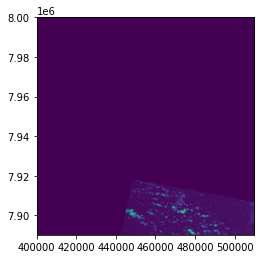

<AxesSubplot:>

In [223]:
from rasterio.plot import show

fp = r'conversion_test.tif'
img = rasterio.open(fp)
show(img)

In [ ]:
## if you use to pyspark/geopyspark:

In [211]:
import rasterio
import geopyspark as gps
import numpy as np

from pyspark import SparkContext

In [207]:
sentinel_jp2 = "S2B_MSIL2A_20191228T205029_N0213_R071_T04KDE_20191228T221518.SAFE/GRANULE/L2A_T04KDE_A014683_20191228T205032/IMG_DATA/R10m/T04KDE_20191228T205029_AOT_10m.jp2"
arrs = []

# for jp2 in jp2s:
with rasterio.open(sentinel_jp2) as f:
    arrs.append(f.read(1))

data = np.array(arrs, dtype=arrs[0].dtype)
data

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 204, 204, 204],
        [  0,   0,   0, ..., 204, 204, 204],
        [  0,   0,   0, ..., 204, 204, 204]]], dtype=uint16)

In [ ]:
# We can create a Tile instance from our multiband, raster array and the nodata value from rasterio
tile = gps.Tile.from_numpy_array(numpy_array=data, no_data_value=f.nodata)
tile

## import Planet imagery

In [175]:
from planet import api as Planet_api

client = Planet_api.ClientV1(api_key='xxxxxxxx')

In [197]:
# AOI geometry
# get bounding box from:  https://boundingbox.klokantech.com/
# [[[-166.6285490387,53.883658777],[-166.4455784789,53.883658777],[-166.4455784789,53.9793110097],[-166.6285490387,53.9793110097],[-166.6285490387,53.883658777]]]
bb = [[-166.63,53.88],[-166.45,53.88],[-166.45,53.98],[-166.63,53.98],[-166.63,53.88]]

aoi = {
  "type": "Polygon",
  "coordinates": [bb],
}

max_cloud_percentage = 0.1

# build a filter for the AOI
query = Planet_api.filters.and_filter(
  Planet_api.filters.geom_filter(aoi),
  Planet_api.filters.range_filter('cloud_cover', gt=0),
  Planet_api.filters.range_filter('cloud_cover', lt=max_cloud_percentage)
)


In [198]:
# we are requesting PlanetScope 3 Band imagery
item_types = ['PSScene3Band']
request = Planet_api.filters.build_search_request(query, item_types)

In [199]:
# this will cause an exception if there are any API related errors
results = client.quick_search(request)

In [200]:
type(results)

planet.api.models.Items

In [201]:
# directory path to save images
save_dir = 'planet_images'
no_of_images = 1

# items_iter returns an iterator over API response pages
for item in results.items_iter(no_of_images):
    # each item is a GeoJSON feature
    print(item['id'])
    assets = client.get_assets(item).get()
    activation = client.activate(assets['visual'])

    callback = Planet_api.write_to_file(directory=save_dir)
    body = client.download(assets['visual'], callback=callback)
    body.await()

20210114_221647_58_2408


NoPermission: {"general": [{"message": "Download quota has been exceeded."}], "field": {}}

## Try with OWSLib

In [4]:
from owslib.wms import WebMapService

In [5]:
wms = WebMapService('http://wms.jpl.nasa.gov/wms.cgi', version='1.1.1')

ConnectionError: HTTPConnectionPool(host='wms.jpl.nasa.gov', port=80): Max retries exceeded with url: /wms.cgi?service=WMS&request=GetCapabilities&version=1.1.1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fc1b639bdd0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [ ]:
wms.identification.type